# Tutorial 0 - Creating a new dataset
## Step 1: Import FANFARE source code

In [1]:
import source as sc

submodule "power_class" imported
fanfare submodule "aux" imported
fanfare module import complete


## Step 2: Load data
First, we start an object that will contain the data to be used. 
### Option 1: Downloading Energinet data
To download Energinet data for DK1 and DK2, data_type must be set to 'energinet'. In this example a file name is supplied which will make sure that the data is stored to avoid the download next time:

In [2]:
data_ob = sc.PowerData(data_type='energinet',file_name='energinet_all',line_limit=200000)

Reading in new dataset
Data type: energinet
Found duplicates at:
2011-10-30T02:00:00
2012-10-28T02:00:00
2013-10-27T02:00:00
2014-10-26T02:00:00
2015-10-25T02:00:00
2016-10-30T02:00:00
2017-10-29T02:00:00
Removed duplicates
Saving new data for next time at
data/energinet_all


Now the data has been stored in a dataframe which is an attribute to data_ob. 
For convenience this file is also included in the release of this code, and can be reloaded, see below.

### Option 2: Loading your own dataset
If you want to run the code on your own dataset, save your data in a dataframe and make sure to set the keyword load=True and supply a file name. As an example, here we load the dataset stored above, for year 2018:

In [3]:
data_ob = sc.PowerData(load=True,file_name='energinet_all',year='2018')

Loading previously stored dataset
Could not estimate residual load, one of the following columns were missing: 
GrossCon, WindPowerProd, SolarPowerProd
(if data_type = "energinet", this is fine, ResLoad_DK, ResLoad_DK1, ResLoad_DK2 should be there)


*OBS: IF you are creating and loading your own dataframe*, make sure the dataframe contains the following columns:
- datetime: time stamps in pandas datetime64[ns] format
- GrossCon: gross electricity consumption [MW]
- ResLoad: Residual load [MW]
- WindPowerProd: Wind power production [MW]
- SolarPowerProd: Solar power production [MW]

### Checking your dataset
To check out the head and tail of the dataset, use:

In [4]:
data_ob.data_df.head()

,datetime,GrossCon_DK,SolarPowerProd_DK,WindPowerProd_DK,GrossCon_DK1,SolarPowerProd_DK1,WindPowerProd_DK1,GrossCon_DK2,SolarPowerProd_DK2,WindPowerProd_DK2,RenPower_DK,RenPower_DK1,RenPower_DK2,ResLoad_DK,ResLoad_DK1,ResLoad_DK2,delta_time,time_steps
0,2018-01-01 00:00:00,3269.887193,0.0,2284.549790,1914.768168,0.0,1797.443539,1355.119025,0.0,487.106251,2284.549790,1797.443539,487.106251,985.337403,117.324629,868.012774,220924800.0,3600.0
1,2018-01-01 01:00:00,3159.608981,0.0,2287.054348,1850.009270,0.0,1833.770370,1309.599711,0.0,453.283978,2287.054348,1833.770370,453.283978,872.554633,16.238900,856.315733,220928400.0,3600.0
2,2018-01-01 02:00:00,3036.900023,0.0,2144.576052,1775.170172,0.0,1587.734620,1261.729851,0.0,556.841432,2144.576052,1587.734620,556.841432,892.323971,187.435552,704.888419,220932000.0,3600.0
3,2018-01-01 03:00:00,2947.233065,0.0,2225.431576,1723.813080,0.0,1607.496898,1223.419985,0.0,617.934678,2225.431576,1607.496898,617.934678,721.801489,116.316182,605.485307,220935600.0,3600.0
4,2018-01-01 04:00:00,2892.396232,0.0,2264.864407,1695.866947,0.0,1640.890225,1196.529285,0.0,623.974182,2264.864407,1640.890225,623.974182,627.531825,54.976722,572.555103,220939200.0,3600.0


In [5]:
data_ob.data_df.tail()

,datetime,GrossCon_DK,SolarPowerProd_DK,WindPowerProd_DK,GrossCon_DK1,SolarPowerProd_DK1,WindPowerProd_DK1,GrossCon_DK2,SolarPowerProd_DK2,WindPowerProd_DK2,RenPower_DK,RenPower_DK1,RenPower_DK2,ResLoad_DK,ResLoad_DK1,ResLoad_DK2,delta_time,time_steps
8754,2018-12-31 19:00:00,4268.503876,0.0,4304.735548,2541.038148,0.0,3476.192489,1727.465728,0.0,828.543059,4304.735548,3476.192489,828.543059,-36.231672,-935.154341,898.922669,252442800.0,3600.0
8755,2018-12-31 20:00:00,4011.373445,0.0,4197.116682,2417.518358,0.0,3298.266873,1593.855087,0.0,898.849809,4197.116682,3298.266873,898.849809,-185.743237,-880.748515,695.005278,252446400.0,3600.0
8756,2018-12-31 21:00:00,3900.636079,0.0,3952.505899,2368.442536,0.0,3016.543442,1532.193543,0.0,935.962457,3952.505899,3016.543442,935.962457,-51.869820,-648.100906,596.231086,252450000.0,3600.0
8757,2018-12-31 22:00:00,3720.453527,0.0,3665.420315,2256.244137,0.0,2842.107572,1464.209390,0.0,823.312743,3665.420315,2842.107572,823.312743,55.033212,-585.863435,640.896647,252453600.0,3600.0
8758,2018-12-31 23:00:00,3624.301005,0.0,3712.322637,2216.525324,0.0,2890.511084,1407.775681,0.0,821.811553,3712.322637,2890.511084,821.811553,-88.021632,-673.985760,585.964128,252457200.0,3600.0


You can also get some general info, by using the method info() on the data object:

In [6]:
data_ob.info()


--------
Data object contains:
8759 data points
from 2018-01-01 00:00:00 to 2018-12-31 23:00:00
Minimum time step: 3600.0 sec
Maximum time step: 7200.0 sec
For Bornholm:
Could not find Bornholm data
Most common time step: 3600.0 sec
--------


(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-12-31 23:00:00'))

## Step 3: Make a test plot of your data

List of line styles not the same length as list of column names, will use solid lines


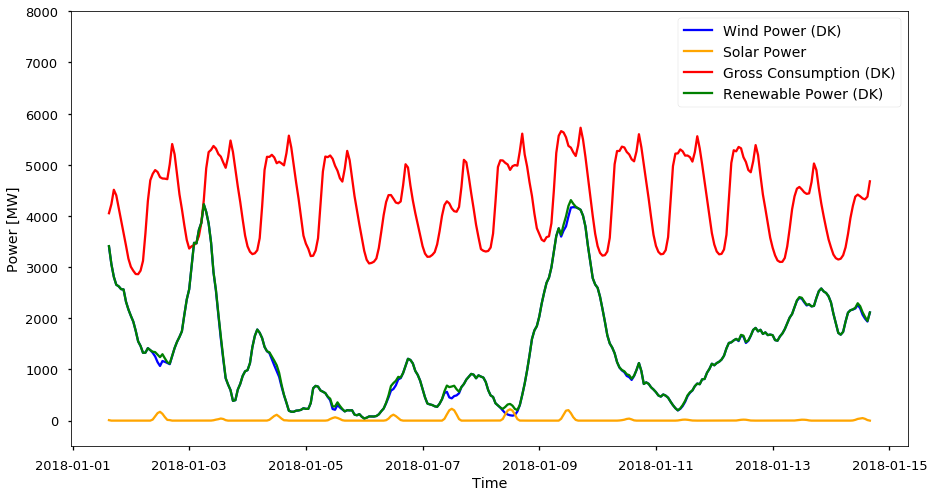

In [7]:
time_cut = ['2018-01-01 14:00:00','2018-01-14 17:00:00']
data_ob.PlotTimeSeries(col_names=['WindPowerProd_DK','SolarPowerProd_DK','GrossCon_DK','RenPower_DK'],\
                colors=['b','orange','r','g'],
                labels=['Wind Power (DK)','Solar Power','Gross Consumption (DK)','Renewable Power (DK)'],\
                legend=True,ylab='Power [MW]',time_cut=time_cut,ylim=[-500,8000],\
                fig_name='timeseries')